In [7]:
#LEARNING SIMPLE AGENT BASED MODELLING IN PYTHON

In [8]:
#Setting the Network

In [9]:
#Setting Parameter

vowels = ['a','i']

personalities = ['F','S'] # F = Flexible, S =  Stubborn

In [10]:
def make_agent(vowel, personality):
    return [vowel, personality]

#example, creating a flexible agent with vowel i using make_agent function

agent_one = make_agent(vowels[1],personalities[0])
print(agent_one)

['i', 'F']


In [11]:
#create a function that generates a population of N identical agents with given parameters

def make_population_identical(N):
    
    population = []
    
    for i in range(N):
        
        agent = make_agent(vowels[1], personalities[0])
        
        population.append(agent)
        
    return population

# call the function to make a population of 5 identical agents

population_test = make_population_identical(5)
print(population_test)

[['i', 'F'], ['i', 'F'], ['i', 'F'], ['i', 'F'], ['i', 'F']]


In [12]:
#Create a function that generates of population of N agents with randomly selected parameters from each list

import random

def make_population_random(N):
    
    population = []
    
    for i in range(N):
        
        v = random.choice(vowels)
        
        p = random.choice(personalities)
        
        agent = make_agent(v,p)
        
        population.append(agent)
        
    return population

In [13]:
#call function to make a population of 5 random agents
population = make_population_random(5)
print(population)

[['i', 'F'], ['i', 'F'], ['i', 'S'], ['i', 'S'], ['i', 'F']]


In [14]:
#now using "random,int()"

def make_population(N):
    
    population = []
    for i in range(N):
        v=random.randint(0,1)
        p=random.randint(0,1)
        agent = make_agent(vowels[v], personalities[p])
        population.append(agent)
    return population

#Call the function to create population of 10 random agents
pop = make_population(8)
print(pop)

[['a', 'S'], ['i', 'S'], ['i', 'S'], ['i', 'S'], ['a', 'F'], ['i', 'F'], ['a', 'S'], ['a', 'S']]


In [15]:
#Create a function that calculates the proportion of agents with the variant 'a' in the population

def count(population):
    t = 0. #must be float
    for agent in population:
        if agent[0] == 'a':
            t = t + 1 #the syntax add =+ add 1 to t (or: t=t+1)
    return t / len(population)

In [16]:
#Call the function on a population of 20 random agents

prop_a = count(make_population(20))
print ('The proportion of [a] in the population is', prop_a)

The proportion of [a] in the population is 0.4


In [17]:
#Creating interaction of agent

In [18]:
from numpy.random import choice

def choose_pair(population):
    i = random.randint(0, len(population) - 1) #python counts from 0 so pop(8)is an error
    j = random.randint(0, len(population) - 1)
    
    while i == j:
        j = random.randint(0, len(population) - 1)#make sure the same agent is not selected twice
    return population[i], population[j]

#Testing time
#run this box of code multiple times to make sure you are really getting random pairs

pop = make_population(8)
listener, producer = choose_pair(pop)

print('The population is ===', population)
print('This is the choosen pair ===', listener, producer)
print('The listener is ===', listener)
print('The producer is ===', producer)        

The population is === [['i', 'F'], ['i', 'F'], ['i', 'S'], ['i', 'S'], ['i', 'F']]
This is the choosen pair === ['i', 'S'] ['a', 'S']
The listener is === ['i', 'S']
The producer is === ['a', 'S']


In [19]:
from copy import deepcopy

def interact_test(listener, producer):
    
    if listener[0] == producer[0]:
        return listener # if the listener and producer have the same vowel, no changes
    else:
        if listener[1]=='S':
            return listener #if the listener personalities stubborn ,then nothing changes
        else:
            listener[0]=deepcopy(producer[0])
            return listener

In [20]:
#calling the function to check the interaction
randomlistener, randomproducer = choose_pair(make_population(8))

print('The listener is', randomlistener)
print('The Producer is', randomproducer)

updated_listener = interact_test(randomlistener, randomproducer)

print('After interaction, the listener is', updated_listener)

The listener is ['i', 'F']
The Producer is ['i', 'S']
After interaction, the listener is ['i', 'F']


In [21]:
#Create a function that only updates agent using "pass" (which means do nothing in python)

def interact(listener,producer):
    
    if listener[0] == producer[0]:
        pass
    else:
        if listener[1]== 'S':
            pass
        else:
            listener[0]=deepcopy(producer[0])

In [22]:
#CREATING THE SIMULATION

In [23]:
#Create a function that simulates a community of size N interacting randomly for K times

def simulate(n, k):
    
    population = make_population(n)
    
    #print("Initial Population:", population)
    
    proportion = [] #make an empty list to keep track of the proportions after every iteration
    
    for i in range(k):
        
        pair = choose_pair(population) #choose pair from population
        
        interact(pair[0],pair[1]) #make the choosen pair interact
        
        proportion.append(count(population)) #track the proportion of vowels in the population during interaction
        
    return population, proportion

Final population === [['i', 'F'], ['a', 'S'], ['i', 'S'], ['i', 'F'], ['i', 'F'], ['i', 'F'], ['i', 'F'], ['i', 'S'], ['i', 'S'], ['i', 'F'], ['a', 'S'], ['a', 'S'], ['i', 'F'], ['i', 'F'], ['a', 'S'], ['i', 'F'], ['i', 'F'], ['i', 'S'], ['i', 'S'], ['i', 'S']]


(0, 1)

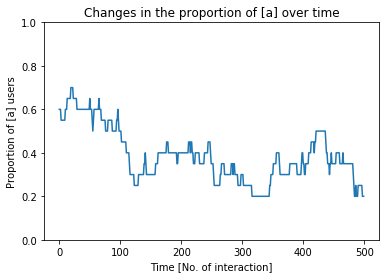

In [24]:
#checking the function works by plotting the change in proportions of vowels over time.
#simulate 500 interaction between 20 agents
new_population, proportion = simulate(20, 500)
print('Final population ===', new_population)

#Make a plot of the changes in proportion of 'a' over interactions

%matplotlib inline
#put plot in the notebook
import matplotlib.pyplot as plt
plt.plot(proportion)

#add details to the plot
plt.title('Changes in the proportion of [a] over time')
plt.xlabel('Time [No. of interaction]')
plt.ylabel('Proportion of [a] users')
plt.ylim(0,1)

   
Changes in the proportion of [a] over time


(0, 1)

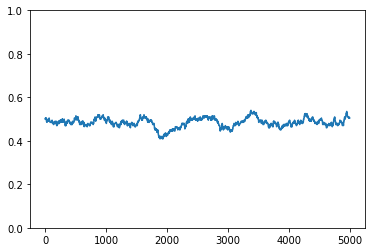

In [25]:
#simulate 5000 interactions between 200 agents
new_population, proportion = simulate(200,5000)
#print("final population:", new_population)

#Make a plot of the changes in proportion of 'a' over interactions
print('   ')
print('Changes in the proportion of [a] over time')
plt.plot(proportion)
plt.ylim(0,1)

In [26]:
#Create a function that runs s simulations of a community of size N interacting randomly for K times

def batch_simulate(n,k,s):
    batch_proportions=[]
    for i in range(s):
        new_population, proportion = simulate(n, k)
        batch_proportions.append(proportion)
    return batch_proportions

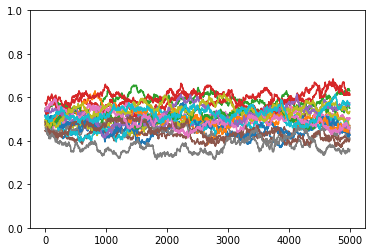

In [27]:
#Make 20 simulations of 5000 interaction between 200 agents
results =  batch_simulate(200,5000,20)
plt.ylim(0,1)

for i in results:
    plt.plot(i)

In [33]:
#The simulation never reach convergence because we dont control the stubborn agents, now we need to modify our function to creaate biased population, where we control the number of stubborn agents
#Modify the function to make pop. of N agents with a given number of stubborn agents (st)

def make_population_biased(N,st):
    population = []
    for i in range(st):
        v = random.randint(0,1)
        agent = make_agent(vowels[v], personalities[1])
        population.append(agent)
    
    for i in range(N-st):
        v = random.randint(0,1)
        agent = make_agent(vowels[v], personalities[0])
        population.append(agent)
        
    return population

#Modify the function so that it calls our biased pop.

def simulate_biased(n,k,st): #st=no. of stubborn
    population = make_population_biased(n,st)
    # print("Initial Population:", population)
    proportion = []
    
    for i in range(k):
        pair = choose_pair(population)
        interact(pair[0],pair[1])
        proportion.append(count(population))
    return population, proportion

Changes in the proportion of [a] over time


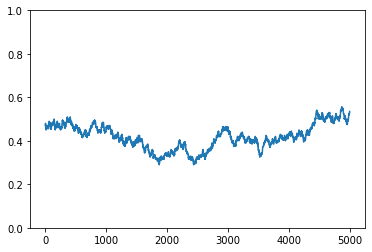

In [34]:
# Run a simulation in a community with no stubborn agents

new_population, proportion = simulate_biased(200,5000,0)
print('Changes in the proportion of [a] over time')
plt.ylim(0,1)
plt.plot(proportion)

Changes in the proportion of [a] over time


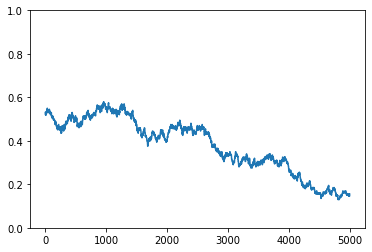

In [35]:
#Run a simulation in a community with 1 stubborn agents

new_population, proportion = simulate_biased(200,5000,1)
print('Changes in the proportion of [a] over time')
plt.ylim(0,1)
plt.plot(proportion)

Changes in the proportion of [a] over time


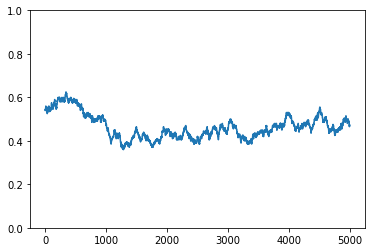

In [36]:
# Run a simulation in a community with 2 stubborn agents

new_population, proportion = simulate_biased(200,5000,2)
print('Changes in the proportion of [a] over time')
plt.ylim(0,1)
plt.plot(proportion)

In [28]:
#We'll run S simulations for each possible proportion of stubborn people. Here, we'll check what happens when there are 0, 1, 2, 25%, 50% and 100% stubborn agents in the population.

In [37]:
#Modify the function so it runs S simulations of each biased population, s=no. of simulations for each bias

def batch_simulate_biased(n,k,s):#n-pop size, k=no. of interactions, s=no. of simulations for each bias
    
    all_results = []
    
    possible_sts = [0,1,2,int(n/4.),int(n/2.),n]
    
    for possible_st in possible_sts:
        
        print(possible_st)
        
        current_results = [] # print the progress of the simulations
        
        for i in range(s):
            
            new_population, proportion = simulate_biased(n,k,possible_st)
            current_results.append(proportion)
            
        all_results.append(current_results)
    
    return all_results

In [38]:
#CHeck the proportion of stubborn agents affects convergence
#run 20 simulations of each stubborness proportions in a community of 200 agents
results =  batch_simulate_biased(200,5000,20)

0
1
2
50
100
200


Text(0, 0.5, 'Proportion Individuals Using [a]')

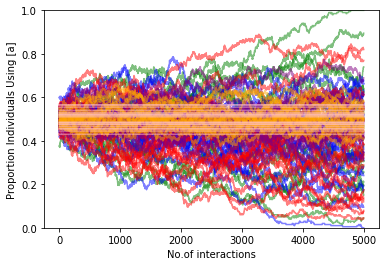

In [40]:
#Plot the results of the simulations

colors = ['green', 'blue', 'red', 'purple', 'orange', 'pink']
for j, st in enumerate(results):
    for simulation in st:
        plt.plot(simulation, color = colors[j], alpha = .5)
    
plt.ylim(0,1)
plt.xlabel('No.of interactions')
plt.ylabel('Proportion Individuals Using [a]')

In [ ]:
#Yg bisa teranalisa cuma dengan ketika komunitas tersebut mempunyai 0-2 agent, mereka terlihat konvergen menuju ke 1 vokal dengan jumlah agent stubborn 50,100,200 terlihat pattern yang berantakan tanpa konvergen menuju ke 1 huruf vokal.